# カーブフィッティング

In [2]:
import numpy as np

## カーブフィッティングとは？

手元にあるデータをある理論曲線に当てはめることを**カーブフィッティング**と呼ぶ．
データ分析では，以下の場面でカーブフィッティングを行う：

1. 回帰分析
   - 手元のデータに対して説明変数と目的変数の間の関数関係（理論曲線）を仮定し，パラメータを調整して当てはめる
2. 確率分布のパラメータ推定
   - 手元のデータから求めたヒストグラムに対して理論的な確率分布を仮定し，そのパラメータを推定する

なお，統計モデルでは，回帰分析における関数関係や理論的な確率分布など，データを当てはめる理論曲線そのものをモデルと呼ぶ．
一方，物理モデルでは，単純化した基礎方程式などから成るモデルがまずあり，それを解析することによって理論曲線を導出する．

## 回帰分析

### Pythonによる実装

Scipyにはカーブフィッティングを実行するための`scipy.optimize.curve_fit`関数が用意されている．

In [1]:
from scipy.optimize import curve_fit

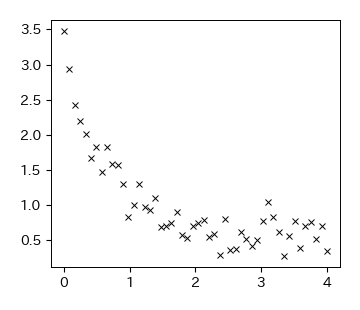

In [13]:
# データの作成
x_data = np.linspace(0, 4, 50)
y_data = func(x_data, 2.5, 1.3, 0.5) + 0.2 * np.random.normal(size=len(xdata))

fig, ax = plt.subplots()
ax.plot(x_data, y_data, 'x')

**関数の定義**

In [9]:
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

# または
# func = lambda x, a, b, c: a * np.exp(-b * x) + c

**フィッティングの実行**

In [10]:
a_ini, b_ini, c_ini= 1, 1, 0.5
p_opt, p_cov = curve_fit(func, xdata, ydata, (a_ini, b_ini, c_ini))

**可視化**

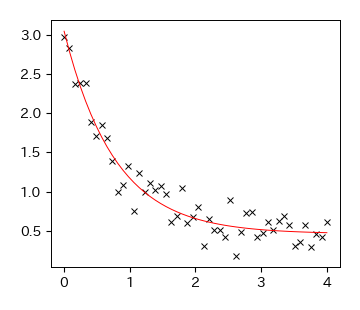

In [12]:
fig, ax = plt.subplots()
ax.plot(x_data, y_data, 'x')
ax.plot(x_data, func(x_data, *p_opt), '-')

### 具体例

## 確率分布のパラメータ推定


確率分布のパラメータ推定では，以下の方法がよく用いられる：

- 最小二乗法
- 最尤推定

このうち，最小二乗法によるパラメータ推定は回帰分析と手続きは同じである．
そこで，以下では最尤推定を扱う．

### 最尤推定